In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
positive = pd.read_csv('pilot/dataframes/positive_games_df.csv').query('type == "comparison"')
negative = pd.read_csv('pilot/dataframes/negative_games_df.csv').query('type == "comparison"')

from ast import literal_eval
def array(x):
    return np.array(literal_eval(x))

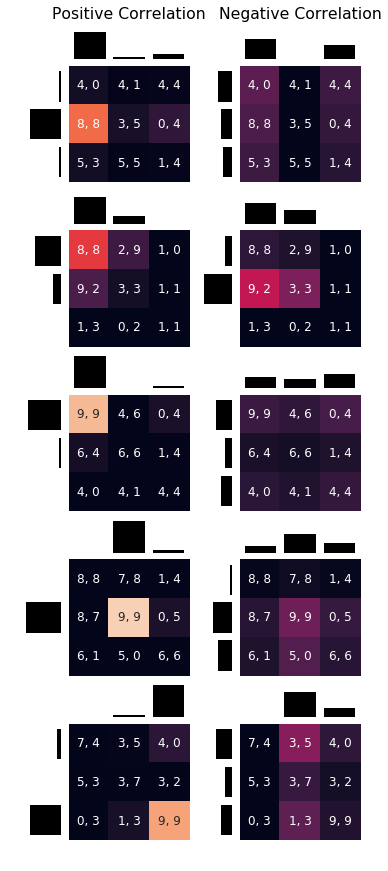

In [250]:
from matplotlib.gridspec import GridSpec

n_game = 5
size = 3
gs = GridSpec(4 * n_game, 4 * 2, figure=plt.figure(figsize=(size * 2, size * n_game)))

def plot_game(title, g, row_play, col_play, top, left):
    top *= 4; left *= 4
    plt.sca(plt.subplot(gs[top+1:top+4, left+1:left+4]))
    row_payoff = g[:, :, 0]
    col_payoff = g[:, :, 1]
    pay = np.array([[f'{row_payoff[i, j]}, {col_payoff[i, j]}' for j in range(3)] for i in range(3)])
    play = row_play[:, None] * col_play
    sns.heatmap(play, vmin=0, vmax=1, annot=pay, fmt='s', annot_kws=dict(size=12), cbar=False)
    plt.xticks([])
    plt.yticks([])

    plt.sca(plt.subplot(gs[top, left+1:left+4]))
    plt.bar(range(3), col_play, color='k')
    # plt.yticks([])
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title(title)

    plt.sca(plt.subplot(gs[top+1:top+4, left]))
    plt.barh(range(3), row_play, color='k')
    # plt.yticks([])
    plt.xlim(0, 1)
    plt.axis('off')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

for idx in range(n_game):
    g = array(positive.iloc[idx].row)
    for i, name, d in [(0, "Positive", positive), (1, "Negative", negative)]:
        title = f"{name} Correlation" if idx == 0 else None
        plot_game(title, g, array(d.iloc[idx].row_play), array(d.iloc[idx].col_play), idx, i)
        
plt.savefig('figs/comparison_games.pdf', bbox_inches='tight')